In [150]:
import pandas as pd
import numpy as np

In [151]:
titanic = pd.read_csv('train.csv')

In [152]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [154]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hoyt, Mr. Frederick Maxfield",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [156]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### - Age plays a important role in survival, so we need to impute the null values and indule it
#### - Females are more likely to survive
#### - children are more likely to survive
#### - people travelling alone and with no siblings are more likely to survive
#### - impute the embark as very less values are missing
#### - P-class people are more likely to survive as they are in upper tier

In [157]:
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

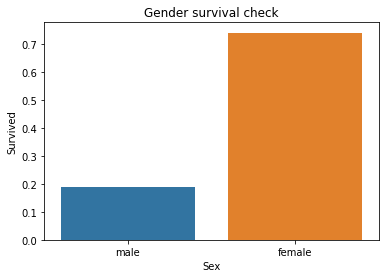

In [158]:
temp = pd.DataFrame((titanic.Survived.value_counts()))
ax = sns.barplot(x="Sex", y="Survived", data=titanic,ci=None).set_title("Gender survival check")
plt.show()

In [159]:
titanic.Sex.value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [160]:
titanic.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

In [161]:
titanic.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

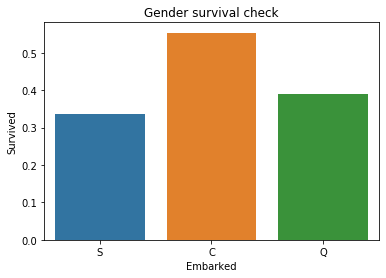

In [162]:
ax = sns.barplot(y="Survived", x="Embarked", data=titanic,ci=None).set_title("Gender survival check")
plt.show()

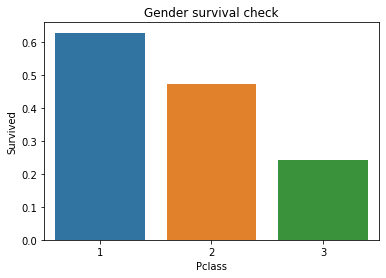

In [163]:
ax = sns.barplot(y="Survived", x="Pclass", data=titanic,ci=None).set_title("Gender survival check")
plt.show()

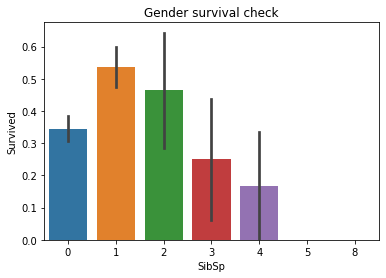

In [164]:
ax = sns.barplot(y="Survived", x="SibSp", data=titanic).set_title("Gender survival check")
plt.show()

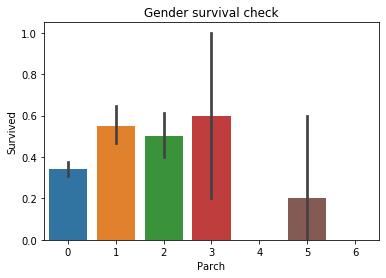

In [165]:
ax = sns.barplot(y="Survived", x="Parch", data=titanic).set_title("Gender survival check")
plt.show()

In [166]:
# Now let's impute the age
print("The number of missing values before imputation: ",titanic.isna().sum())
print("\n")
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

print(titanic.Age.describe())
print("\n")
print("The number of missing values after imputation: ",titanic.isnull().sum())

The number of missing values before imputation:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


The number of missing values after imputation:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [167]:
bins = [0,1,5,12, 18, 28, 30, 45, 50, 55, 100]
labels=['Infant','Babies','Children','Teenage','Youth','Lower middle age','Middle age','Adult','old','Immortals'] 

In [168]:
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Middle age
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Middle age
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Youth
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Youth
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Lower middle age
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Youth


In [169]:
titanic.groupby(['Age_Group'])['Age'].count()

Age_Group
Infant               14
Babies               30
Children             25
Teenage              70
Youth               223
Lower middle age    224
Middle age          202
Adult                39
old                  24
Immortals            40
Name: Age, dtype: int64

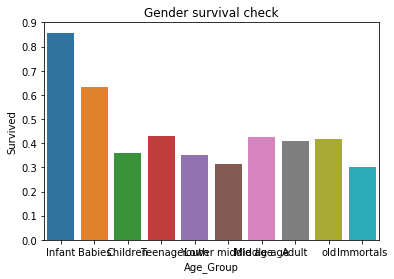

In [170]:
ax = sns.barplot(y="Survived", x="Age_Group", data=titanic,ci=None).set_title("Gender survival check")
plt.show()

In [171]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Group        0
dtype: int64

In [244]:
titanic_pre = titanic.drop(["Cabin",'Name','Ticket'], axis=1)

In [245]:
titanic_pre.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Age_Group      0
dtype: int64

In [246]:
titanic_pre.dropna(inplace=True)

In [247]:
titanic_pre.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_Group      0
dtype: int64

#### titanic_pre contains
#### - Age imputed with mean
#### - Embarked missing values are removed as only two are missing
#### - droped cabin as large data was missing
#### - passenger,name and ticket were dropped as there are unrelated with the problem statement

In [248]:
titanic_pre.describe(include="all")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
count,889.000000,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,10
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Lower middle age
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644,224
mean,446.000000,0.382452,2.311586,NaN,29.653446,0.524184,0.382452,32.096681,NaN,NaN
std,256.998173,0.486260,0.834700,NaN,12.968366,1.103705,0.806761,49.697504,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,224.000000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN
75%,668.000000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN


In [249]:
cat_att=['PassengerId','Pclass','Sex','SibSp','Parch','Embarked','Age_Group']

In [250]:
titanic_pre[cat_att]=titanic_pre[cat_att].astype('category')

In [251]:
titanic_pre.dtypes

PassengerId    category
Survived          int64
Pclass         category
Sex            category
Age             float64
SibSp          category
Parch          category
Fare            float64
Embarked       category
Age_Group      category
dtype: object

In [252]:
titanic_dum = pd.get_dummies(columns=cat_att, data = titanic_pre,drop_first=True)

In [253]:
titanic_dum.head(20)

,Survived,Age,Fare,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,PassengerId_6,PassengerId_7,PassengerId_8,...,Embarked_S,Age_Group_Babies,Age_Group_Children,Age_Group_Teenage,Age_Group_Youth,Age_Group_Lower middle age,Age_Group_Middle age,Age_Group_Adult,Age_Group_old,Age_Group_Immortals
0,0,22.000000,7.2500,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,38.000000,71.2833,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,26.000000,7.9250,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,35.000000,53.1000,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,35.000000,8.0500,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0,29.699118,8.4583,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,54.000000,51.8625,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
7,0,2.000000,21.0750,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
8,1,27.000000,11.1333,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9,1,14.000000,30.0708,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [254]:
X = titanic_dum.drop(['Survived'], axis=1)
X

,Age,Fare,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,PassengerId_6,PassengerId_7,PassengerId_8,PassengerId_9,...,Embarked_S,Age_Group_Babies,Age_Group_Children,Age_Group_Teenage,Age_Group_Youth,Age_Group_Lower middle age,Age_Group_Middle age,Age_Group_Adult,Age_Group_old,Age_Group_Immortals
0,22.000000,7.2500,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,38.000000,71.2833,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26.000000,7.9250,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,35.000000,53.1000,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,35.000000,8.0500,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
887,19.000000,30.0000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
888,29.699118,23.4500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
889,26.000000,30.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [255]:
y = titanic_dum['Survived']

#### train test split with 70:30


In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 916)
(267, 916)
(622,)
(267,)


In [186]:
print(y_train.value_counts())

0    384
1    238
Name: Survived, dtype: int64


### Standardizing the numeric attributes in the train and test data

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [188]:
scaler = MinMaxScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_test[['Age','Fare']]=scaler.transform(X_test[['Age','Fare']])

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [189]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression

# model building

In [190]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.407325
         Iterations: 35


/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.388     
Dependent Variable:         Survived               AIC:                    562.7122  
Date:                       2022-12-02 12:01       BIC:                    686.8346  
No. Observations:           622                    Log-Likelihood:         -253.36   
Df Model:                   27                     LL-Null:                -413.84   
Df Residuals:               594                    LLR p-value:            4.6972e-52
Converged:                  0.0000                 Scale:                  1.0000    
No. Iterations:             35.0000                                                  
-------------------------------------------------------------------------------------
                            Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------------
Age 

## Logistic Regression

In [191]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

LogisticRegression()

### Generating predictions

In [192]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

### Confusion Matrix

In [193]:
confusion_matrix(y_train,train_preds)

array([[346,  38],
       [ 59, 179]])

In [194]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)

In [195]:
print(train_accuracy_1)
print(train_recall_1)
print(train_precision_1)

print(test_accuracy_1)
print(test_recall_1)
print(test_precision_1)

0.8440514469453376
0.7521008403361344
0.8248847926267281
0.7378277153558053
0.6372549019607843
0.6632653061224489


In [196]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [197]:
#Classification report
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       384
           1       0.82      0.75      0.79       238

    accuracy                           0.84       622
   macro avg       0.84      0.83      0.83       622
weighted avg       0.84      0.84      0.84       622



In [198]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       165
           1       0.66      0.64      0.65       102

    accuracy                           0.74       267
   macro avg       0.72      0.72      0.72       267
weighted avg       0.74      0.74      0.74       267



### Naive Bayes Classifier

### Standardizing the numeric attributes in the train and test data

In [199]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
%matplotlib inline

In [200]:
model = GaussianNB().fit(X_train,y_train)

nb_pred_train = model.predict(X_train)  
nb_pred_test = model.predict(X_test) #predict on test data 

In [201]:
nb_pred_train[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [202]:
confusion_matrix(y_train,nb_pred_train)
confusion_matrix(y_test,nb_pred_test)

array([[  9, 156],
       [  4,  98]])

In [203]:
train_accuracy_nb= accuracy_score(y_train,nb_pred_train)
train_recall_nb= recall_score(y_train,nb_pred_train)
train_precision_nb= precision_score(y_train,nb_pred_train)

test_accuracy_nb= accuracy_score(y_test,nb_pred_test)
test_recall_nb= recall_score(y_test,nb_pred_test)
test_precision_nb= precision_score(y_test,nb_pred_test)
print("************************************************")

print("Train Accuracy:",train_accuracy_nb)
print('Train Recall:',train_recall_nb)
print("Train Precision",train_precision_nb)
print("************************************************")
print("Test Accuracy:",test_accuracy_nb)
print("Test Recall:",test_recall_nb)
print('Test Precision:',test_precision_nb)


************************************************
Train Accuracy: 0.4340836012861736
Train Recall: 0.9915966386554622
Train Precision 0.40273037542662116
************************************************
Test Accuracy: 0.40074906367041196
Test Recall: 0.9607843137254902
Test Precision: 0.3858267716535433


### Balancing the class weights

#### Test data pre processing

In [204]:
test_data = pd.read_csv('test.csv')

In [205]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [206]:
# Now let's impute the age
print("The number of missing values before imputation: ",test_data.isna().sum())
print("\n")
test_data['Age'].fillna(titanic['Age'].mean(), inplace=True)

print(test_data.Age.describe())
print("\n")
print("The number of missing values after imputation: ",test_data.isnull().sum())

The number of missing values before imputation:  PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


count    418.000000
mean      30.154603
std       12.636666
min        0.170000
25%       23.000000
50%       29.699118
75%       35.750000
max       76.000000
Name: Age, dtype: float64


The number of missing values after imputation:  PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [207]:
bins = [0,1,5,12, 18, 28, 30, 45, 50, 55, 100]
labels=['Infant','Babies','Children','Teenage','Youth','Lower middle age','Middle age','Adult','old','Immortals'] 

In [208]:
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bins, labels=labels)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,Middle age
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,Immortals
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,Youth
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S,Lower middle age
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Middle age
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Middle age
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,S,Lower middle age


In [209]:
test_data.groupby(['Age_Group'])['Age'].count()

Age_Group
Infant                8
Babies                4
Children             13
Teenage              29
Youth               120
Lower middle age    112
Middle age           80
Adult                21
old                  12
Immortals            19
Name: Age, dtype: int64

In [228]:
test_data_pre = test_data.drop(["Cabin",'Name','Ticket'], axis=1)

In [229]:
test_data_pre.dropna(inplace=True)

In [230]:
test_data_pre.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_Group      0
dtype: int64

In [231]:
cat_att=['PassengerId','Pclass','Sex','SibSp','Parch','Embarked','Age_Group']

In [232]:
test_data_pre[cat_att]=test_data_pre[cat_att].astype('category')

In [233]:
test_data_pre.dtypes

PassengerId    category
Pclass         category
Sex            category
Age             float64
SibSp          category
Parch          category
Fare            float64
Embarked       category
Age_Group      category
dtype: object

In [234]:
test_data_pre_dum = pd.get_dummies(columns=cat_att, data = test_data_pre,drop_first=True)

In [235]:
test_data_pre_dum = test_data_pre_dum.drop(['Parch_9'], axis=1)

In [236]:
test_data_pre_dum.head()

,Age,Fare,PassengerId_893,PassengerId_894,PassengerId_895,PassengerId_896,PassengerId_897,PassengerId_898,PassengerId_899,PassengerId_900,...,Embarked_S,Age_Group_Babies,Age_Group_Children,Age_Group_Teenage,Age_Group_Youth,Age_Group_Lower middle age,Age_Group_Middle age,Age_Group_Adult,Age_Group_old,Age_Group_Immortals
0,34.5,7.8292,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47.0,7.0000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,62.0,9.6875,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27.0,8.6625,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,22.0,12.2875,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [237]:
test_data_pre_dum.columns

Index(['Age', 'Fare', 'PassengerId_893', 'PassengerId_894', 'PassengerId_895',
       'PassengerId_896', 'PassengerId_897', 'PassengerId_898',
       'PassengerId_899', 'PassengerId_900',
       ...
       'Embarked_S', 'Age_Group_Babies', 'Age_Group_Children',
       'Age_Group_Teenage', 'Age_Group_Youth', 'Age_Group_Lower middle age',
       'Age_Group_Middle age', 'Age_Group_Adult', 'Age_Group_old',
       'Age_Group_Immortals'],
      dtype='object', length=444)

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [239]:
scaler = MinMaxScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
test_data_pre_dum[['Age','Fare']]=scaler.transform(test_data_pre_dum[['Age','Fare']])

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [240]:
logi_test = logistic_model.predict(test_data_pre_dum)

ValueError: X has 444 features per sample; expecting 28

In [241]:
logi_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [242]:
df = pd.DataFrame(logi_test)

In [243]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
412,0
413,0
414,0
415,0


In [227]:
df.to_csv('test data titanic')